<a href="https://colab.research.google.com/github/jithesh9539/Week6Assignment_Undersampling_Oversampling/blob/main/Week_6_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Decision Tree and other Classification Models**
Course: CMPE 257 Machine Learning

Dataset: [Spotify Tracks DB](https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db)

**Submitted by: Priyanka Math**


**Goal: Popularity Prediction**

### Importing Libraries

In [177]:
# importing the necessary packages
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Data Loading

In [178]:
# importing the data
tracks_df=pd.read_csv('../content/tracks.csv')
tracks_df.head()

id                                 name  popularity  \
0  35iwgR4jXetI318WEWsa1Q                                Carve           6   
1  021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista           0   
2  07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado           0   
3  08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado           0   
4  08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening           0   

   duration_ms  explicit              artists                  id_artists  \
0       126903         0              ['Uli']  ['45tIt06XoI0Iio4LBEVpls']   
1        98200         0  ['Fernando Pessoa']  ['14jtPCOoNZwquk5wd9DxrY']   
2       181640         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
3       176907         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
4       163080         0      ['Dick Haymes']  ['3BiJGZsyX9sJchTqcSA7Su']   

  release_date  danceability  energy  key  loudness  mode  speechiness  \
0   1922-02-22         0.645  0.4450    0   -13.338     1       0.4510   
1   1922-06-01         0.695  0.2630    0   -22.136     1       0.9570   
2   1922-03-21         0.434  0.1770    1   -21.180     1       0.0512   
3   1922-03-21         0.321  0.0946    7   -27.961     1       0.0504   
4         1922         0.402  0.1580    3   -16.900     0       0.0390   

   acousticness  instrumentalness  liveness  valence    tempo  time_signature  
0         0.674            0.7440     0.151    0.127  104.851               3  
1         0.797            0.0000     0.148    0.655  102.009               1  
2         0.994            0.0218     0.212    0.457  130.418               5  
3         0.995            0.9180     0.104    0.397  169.980               3  
4         0.989            0.1300     0.311    0.196  103.220               4

### Description of Audio Features:
The songs have certain audio features associated with them. Let's understand what they mean and what correaltion they have with each other.

*   **danceability** - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. 
*   **energy** - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
*   **key** - The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
*   **loudness** - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
*   **mode** - Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
*   **speechiness** - Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. 
*   **acousticness** - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
*   **instrumentalness** - Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. 
*   **liveness** - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
*   **valence** - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). 
*   **tempo** - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
*   **duration_ms** - The duration of the track in milliseconds.
*   **time_signature** - An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

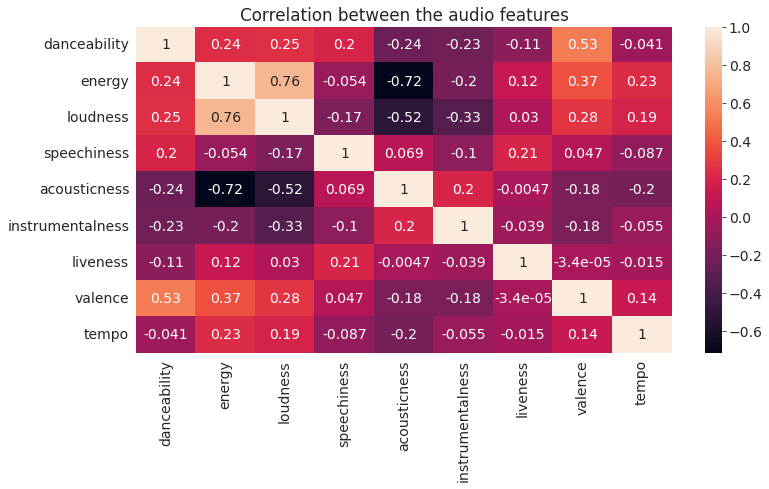

In [179]:
corr = tracks_df[['danceability', 
                  'energy', 
                  'loudness', 
                  'speechiness', 
                  'acousticness', 
                  'instrumentalness', 
                  'liveness',
                  'valence', 
                  'tempo' ]].corr()

plt.title('Correlation between the audio features')
sns.heatmap(corr, annot=True);

### Release Date


In [180]:
px.scatter(tracks_df, x='release_date', y='popularity', title='Release Date vs. Popularity')

It can be observed from the graph that the songs released more recently have higher popularity. Note that this dataset only contains songs released upto 'April 2021'. 

### Preprocessing and Feature Engineering

We will look at the available columns, and figure out if we can create new columns or apply any useful transformations.

In [181]:
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

#### Year

In [182]:
tracks_df['release_date'].sample(10)

93619     2020-12-24
444222    2017-10-20
322884    2013-05-21
101494          1979
253722    2005-01-01
371262    2009-04-15
398281    2014-11-11
157722    2016-04-29
373517    2017-09-01
347296    1987-01-01
Name: release_date, dtype: object

The `release_date` column of the data frame contains inconsistent data. In some of the cases it only contains the year value of the date. To keep the data consistent we will add a new column named `year` containing only the release year of the song.

In [183]:
def to_year(x):
    result = []
    x.to_string()
    for i in x:
        result.append(int(i[:4]))
    return result

tracks_df['year'] = to_year(tracks_df.release_date)

As the format of the date in release_date column is either year-month-day or year, we will extract the first 4 digits as year with the help of above function.

In [184]:
tracks_df['year'].sample(10)

396908    2006
409770    1988
538072    1981
191287    1971
420390    2019
169150    1992
386138    1999
11048     1936
56624     1983
509139    2014
Name: year, dtype: int64

Along with the `year` column we can also add information about how old the song is at present. For that we will find the max value of `year` and calculate it's difference with every other row.

In [185]:
max_year = tracks_df['year'].max()
tracks_df['years_old'] = max_year - tracks_df['year']
tracks_df['years_old'].sample(10)

448045    21
30041     65
585956    38
293608    11
477389    24
582359     7
346470    40
28219     67
342794    16
252869    21
Name: years_old, dtype: int64

#### Tempo

In [186]:
tracks_df['tempo'].value_counts()

0.000      328
128.003     98
119.994     91
139.980     89
127.994     86
          ... 
63.011       1
187.157      1
200.225      1
70.039       1
63.696       1
Name: tempo, Length: 122706, dtype: int64

The `tempo` column contains many zero values. We will replace the zero values with the mean of all the other non-zero values in the dataset.

In [187]:
tracks_df.loc[tracks_df['tempo'] == 0 , 'tempo'] = tracks_df.loc[tracks_df['tempo'] > 0 , 'tempo'].mean()

tracks_df['tempo'].value_counts()

118.531126    328
128.003000     98
119.994000     91
139.980000     89
127.994000     86
             ... 
63.011000       1
187.157000      1
200.225000      1
70.039000       1
63.696000       1
Name: tempo, Length: 122706, dtype: int64

#### Artists

The artist of the song can have a large impact on the popularity of the song. So we will add a new column `artist_popularity` containing the artist's mean popularity. For that we will also need the `mean` and `count` columns.

In [188]:
tracks_df['mean'] = tracks_df.groupby('artists')['popularity'].transform('mean')
tracks_df['count'] = tracks_df.groupby('artists')['popularity'].transform('count')

In [189]:
def get_artist_popularity(x, y):
  result = y.groupby(x.artists).agg(['mean', 'count'])
  result.loc[result['count'] <= 2, 'mean'] = y.mean()
  result.loc[result['count'] >= 600, 'mean'] = 0
  return result

The above function processes the artists column as follows:

*  Stores the artists mean popularity.
*  Replaces the data where artists appear less than `2` times with mean popularity.
*  Replaces the data where artists appear more than `600` times with `0`.

In [190]:
temp_df = tracks_df.drop('popularity', axis=1)
result_df = get_artist_popularity(temp_df, tracks_df['popularity'])['mean']
tracks_df['artist_popularity'] = np.where(tracks_df['artists'].isin(result_df.index), 
                                          tracks_df['artists'], 
                                          'unknown')
tracks_df['artist_popularity'] = tracks_df['artist_popularity'].map(result_df)

In [191]:
tracks_df[['artists', 'artist_popularity']].sample(10)

artists  artist_popularity
355973                       ['Barış Manço']          25.090909
336076                       ['Be My Guest']          27.570053
190321                            ['Fairuz']          20.394422
474047                        ['Fun People']          32.000000
363196                      ['Pino Daniele']          24.401042
528191     ['Shaan', 'Sowmya Raoh', 'Wajid']          27.570053
522604  ['P. Susheela', 'N. S. Prakash Rao']          27.570053
545268                    ['Merlyn Uusküla']          24.000000
478983       ['Macha Y El Bloque Depresivo']          27.570053
298542                             ['Queen']           0.000000

### Latent Variables

We have identified 2 latent variables and added them into our dataframe through computation.
1. Artists Popularity
2. Years old (The songs released more recently have higher popularity)

In [192]:
tracks_df['pop_bins'] = pd.cut(x=tracks_df['popularity'], bins=[-1, 49, 100])
tracks_df.head()

id                                 name  popularity  \
0  35iwgR4jXetI318WEWsa1Q                                Carve           6   
1  021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista           0   
2  07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado           0   
3  08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado           0   
4  08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening           0   

   duration_ms  explicit              artists                  id_artists  \
0       126903         0              ['Uli']  ['45tIt06XoI0Iio4LBEVpls']   
1        98200         0  ['Fernando Pessoa']  ['14jtPCOoNZwquk5wd9DxrY']   
2       181640         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
3       176907         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
4       163080         0      ['Dick Haymes']  ['3BiJGZsyX9sJchTqcSA7Su']   

  release_date  danceability  energy  ...  liveness  valence    tempo  \
0   1922-02-22         0.645  0.4450  ...     0.151    0.127  104.851   
1   1922-06-01         0.695  0.2630  ...     0.148    0.655  102.009   
2   1922-03-21         0.434  0.1770  ...     0.212    0.457  130.418   
3   1922-03-21         0.321  0.0946  ...     0.104    0.397  169.980   
4         1922         0.402  0.1580  ...     0.311    0.196  103.220   

   time_signature  year  years_old      mean  count  artist_popularity  \
0               3  1922         99  1.000000      6           1.000000   
1               1  1922         99  0.000000     50           0.000000   
2               5  1922         99  0.064286    560           0.064286   
3               3  1922         99  0.064286    560           0.064286   
4               4  1922         99  3.910714     56           3.910714   

   pop_bins  
0  (-1, 49]  
1  (-1, 49]  
2  (-1, 49]  
3  (-1, 49]  
4  (-1, 49]  

[5 rows x 26 columns]

In [193]:
tracks_df['pop_bins'].unique()


[(-1, 49], (49, 100]]
Categories (2, interval[int64, right]): [(-1, 49] < (49, 100]]

In [194]:
tracks_df['pop_bins'].isna().sum()

0

In [195]:
tracks_df['popular'] = pd.cut(x=tracks_df['popularity'], bins=[-1, 49, 100], labels=[0, 1])
tracks_df.head()

id                                 name  popularity  \
0  35iwgR4jXetI318WEWsa1Q                                Carve           6   
1  021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista           0   
2  07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado           0   
3  08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado           0   
4  08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening           0   

   duration_ms  explicit              artists                  id_artists  \
0       126903         0              ['Uli']  ['45tIt06XoI0Iio4LBEVpls']   
1        98200         0  ['Fernando Pessoa']  ['14jtPCOoNZwquk5wd9DxrY']   
2       181640         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
3       176907         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
4       163080         0      ['Dick Haymes']  ['3BiJGZsyX9sJchTqcSA7Su']   

  release_date  danceability  energy  ...  valence    tempo  time_signature  \
0   1922-02-22         0.645  0.4450  ...    0.127  104.851               3   
1   1922-06-01         0.695  0.2630  ...    0.655  102.009               1   
2   1922-03-21         0.434  0.1770  ...    0.457  130.418               5   
3   1922-03-21         0.321  0.0946  ...    0.397  169.980               3   
4         1922         0.402  0.1580  ...    0.196  103.220               4   

   year  years_old      mean  count  artist_popularity  pop_bins  popular  
0  1922         99  1.000000      6           1.000000  (-1, 49]        0  
1  1922         99  0.000000     50           0.000000  (-1, 49]        0  
2  1922         99  0.064286    560           0.064286  (-1, 49]        0  
3  1922         99  0.064286    560           0.064286  (-1, 49]        0  
4  1922         99  3.910714     56           3.910714  (-1, 49]        0  

[5 rows x 27 columns]

In [215]:
tracks_df['popular'].value_counts(normalize=True)

0    0.870723
1    0.129277
Name: popular, dtype: float64

### Input and Target Columns

Let's select the columns that we will use for training.

In [197]:
tracks_df.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'year', 'years_old',
       'mean', 'count', 'artist_popularity', 'pop_bins', 'popular'],
      dtype='object')

In [198]:
tracks_df_copy = tracks_df.copy()

In [199]:
tracks_df_copy

id                                 name  \
0       35iwgR4jXetI318WEWsa1Q                                Carve   
1       021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista   
2       07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado   
3       08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado   
4       08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening   
...                        ...                                  ...   
586667  5rgu12WBIHQtvej2MdHSH0                                  云与海   
586668  0NuWgxEp51CutD2pJoF4OM                                blind   
586669  27Y1N4Q4U3EfDU5Ubw8ws2            What They'll Say About Us   
586670  45XJsGpFTyzbzeWK8VzR8S                      A Day At A Time   
586671  5Ocn6dZ3BJFPWh4ylwFXtn                     Mar de Emociones   

        popularity  duration_ms  explicit                          artists  \
0                6       126903         0                          ['Uli']   
1                0        98200         0              ['Fernando Pessoa']   
2                0       181640         0              ['Ignacio Corsini']   
3                0       176907         0              ['Ignacio Corsini']   
4                0       163080         0                  ['Dick Haymes']   
...            ...          ...       ...                              ...   
586667          50       258267         0                      ['阿YueYue']   
586668          72       153293         0                   ['ROLE MODEL']   
586669          70       187601         0                      ['FINNEAS']   
586670          58       142003         0  ['Gentle Bones', 'Clara Benin']   
586671          38       214360         0                    ['Afrosound']   

                                               id_artists release_date  \
0                              ['45tIt06XoI0Iio4LBEVpls']   1922-02-22   
1                              ['14jtPCOoNZwquk5wd9DxrY']   1922-06-01   
2                              ['5LiOoJbxVSAMkBS2fUm3X2']   1922-03-21   
3                              ['5LiOoJbxVSAMkBS2fUm3X2']   1922-03-21   
4                              ['3BiJGZsyX9sJchTqcSA7Su']         1922   
...                                                   ...          ...   
586667                         ['1QLBXKM5GCpyQQSVMNZqrZ']   2020-09-26   
586668                         ['1dy5WNgIKQU6ezkpZs4y8z']   2020-10-21   
586669                         ['37M5pPGs6V1fchFJSgCguX']   2020-09-02   
586670  ['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...   2021-03-05   
586671                         ['0i4Qda0k4nf7jnNHmSNpYv']   2015-07-01   

        danceability  energy  ...  valence    tempo  time_signature  year  \
0              0.645  0.4450  ...   0.1270  104.851               3  1922   
1              0.695  0.2630  ...   0.6550  102.009               1  1922   
2              0.434  0.1770  ...   0.4570  130.418               5  1922   
3              0.321  0.0946  ...   0.3970  169.980               3  1922   
4              0.402  0.1580  ...   0.1960  103.220               4  1922   
...              ...     ...  ...      ...      ...             ...   ...   
586667         0.560  0.5180  ...   0.2110  131.896               4  2020   
586668         0.765  0.6630  ...   0.6860  150.091               4  2020   
586669         0.535  0.3140  ...   0.0663  145.095               4  2020   
586670         0.696  0.6150  ...   0.4380   90.029               4  2021   
586671         0.686  0.7230  ...   0.9750  112.204               4  2015   

        years_old       mean  count  artist_popularity   pop_bins  popular  
0              99   1.000000      6           1.000000   (-1, 49]        0  
1              99   0.000000     50           0.000000   (-1, 49]        0  
2              99   0.064286    560           0.064286   (-1, 49]        0  
3              99   0.064286    560           0.064286   (-1, 49]        0  
4              99   3.910714     56    

In [200]:
input_columns = ['years_old', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 
                 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 
                 'liveness', 'valence', 'tempo', 'time_signature', 'artist_popularity']

target_column = 'popular'

Let's also identify the numeric and categorical columns.

In [201]:
numeric_cols = ['years_old', 'duration_ms', 'explicit', 'danceability', 'energy', 
                'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 
                'liveness', 'valence', 'tempo', 'artist_popularity']
categorical_cols = ['key', 'time_signature']

Looking at the values of `key` and `time_signature` columns, it seems that using them as categorical columns would make more sense.

In [202]:
tracks_df['key'].value_counts()

0     74950
7     73779
2     66552
9     65128
5     53614
4     48220
1     41736
11    39132
10    37710
8     33460
6     30856
3     21535
Name: key, dtype: int64

In [203]:
tracks_df['time_signature'].value_counts()

4    503808
3     64523
5     11400
1      6604
0       337
Name: time_signature, dtype: int64

### Encoding Categorical Columns

In [204]:
from sklearn.preprocessing import OneHotEncoder

In [205]:
tracks_df[categorical_cols]

key  time_signature
0         0               3
1         0               1
2         1               5
3         7               3
4         3               4
...     ...             ...
586667    0               4
586668    0               4
586669    7               4
586670   10               4
586671    6               4

[586672 rows x 2 columns]

In [206]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(tracks_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names(categorical_cols))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [207]:
tracks_df[encoded_cols] = encoder.transform(tracks_df[categorical_cols])

In [208]:
tracks_df

id                                 name  \
0       35iwgR4jXetI318WEWsa1Q                                Carve   
1       021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista   
2       07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado   
3       08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado   
4       08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening   
...                        ...                                  ...   
586667  5rgu12WBIHQtvej2MdHSH0                                  云与海   
586668  0NuWgxEp51CutD2pJoF4OM                                blind   
586669  27Y1N4Q4U3EfDU5Ubw8ws2            What They'll Say About Us   
586670  45XJsGpFTyzbzeWK8VzR8S                      A Day At A Time   
586671  5Ocn6dZ3BJFPWh4ylwFXtn                     Mar de Emociones   

        popularity  duration_ms  explicit                          artists  \
0                6       126903         0                          ['Uli']   
1                0        98200         0              ['Fernando Pessoa']   
2                0       181640         0              ['Ignacio Corsini']   
3                0       176907         0              ['Ignacio Corsini']   
4                0       163080         0                  ['Dick Haymes']   
...            ...          ...       ...                              ...   
586667          50       258267         0                      ['阿YueYue']   
586668          72       153293         0                   ['ROLE MODEL']   
586669          70       187601         0                      ['FINNEAS']   
586670          58       142003         0  ['Gentle Bones', 'Clara Benin']   
586671          38       214360         0                    ['Afrosound']   

                                               id_artists release_date  \
0                              ['45tIt06XoI0Iio4LBEVpls']   1922-02-22   
1                              ['14jtPCOoNZwquk5wd9DxrY']   1922-06-01   
2                              ['5LiOoJbxVSAMkBS2fUm3X2']   1922-03-21   
3                              ['5LiOoJbxVSAMkBS2fUm3X2']   1922-03-21   
4                              ['3BiJGZsyX9sJchTqcSA7Su']         1922   
...                                                   ...          ...   
586667                         ['1QLBXKM5GCpyQQSVMNZqrZ']   2020-09-26   
586668                         ['1dy5WNgIKQU6ezkpZs4y8z']   2020-10-21   
586669                         ['37M5pPGs6V1fchFJSgCguX']   2020-09-02   
586670  ['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...   2021-03-05   
586671                         ['0i4Qda0k4nf7jnNHmSNpYv']   2015-07-01   

        danceability  energy  ...  key_7  key_8  key_9  key_10  key_11  \
0              0.645  0.4450  ...    0.0    0.0    0.0     0.0     0.0   
1              0.695  0.2630  ...    0.0    0.0    0.0     0.0     0.0   
2              0.434  0.1770  ...    0.0    0.0    0.0     0.0     0.0   
3              0.321  0.0946  ...    1.0    0.0    0.0     0.0     0.0   
4              0.402  0.1580  ...    0.0    0.0    0.0     0.0     0.0   
...              ...     ...  ...    ...    ...    ...     ...     ...   
586667         0.560  0.5180  ...    0.0    0.0    0.0     0.0     0.0   
586668         0.765  0.6630  ...    0.0    0.0    0.0     0.0     0.0   
586669         0.535  0.3140  ...    1.0    0.0    0.0     0.0     0.0   
586670         0.696  0.6150  ...    0.0    0.0    0.0     1.0     0.0   
586671         0.686  0.7230  ...    0.0    0.0    0.0     0.0     0.0   

        time_signature_0  time_signature_1  time_signature_3  \
0                    0.0               0.0               1.0   
1                    0.0               1.0               0.0   
2                    0.0               0.0               0.0   
3                    0.0               0.0               1.0   
4                    0.0               0.0               0.0   
...                  ...               ...               ...   
586667      

### Scaling Numeric Values

Let's scale the numeric values in the 0 to 1 range.

In [209]:
from sklearn.preprocessing import MinMaxScaler

In [210]:
scaler = MinMaxScaler().fit(tracks_df[numeric_cols])

In [211]:
tracks_df[numeric_cols] = scaler.transform(tracks_df[numeric_cols])

In [212]:
tracks_df[numeric_cols]

years_old  duration_ms  explicit  danceability  energy  loudness  \
0        0.818182     0.021994       0.0      0.650858  0.4450  0.713748   
1        0.818182     0.016885       0.0      0.701312  0.2630  0.579173   
2        0.818182     0.031737       0.0      0.437941  0.1770  0.593796   
3        0.818182     0.030895       0.0      0.323915  0.0946  0.490073   
4        0.818182     0.028434       0.0      0.405651  0.1580  0.659263   
...           ...          ...       ...           ...     ...       ...   
586667   0.008264     0.045377       0.0      0.565086  0.5180  0.803491   
586668   0.008264     0.026691       0.0      0.771948  0.6630  0.837876   
586669   0.008264     0.032798       0.0      0.539859  0.3140  0.721626   
586670   0.000000     0.024682       0.0      0.702321  0.6150  0.822748   
586671   0.049587     0.037562       0.0      0.692230  0.7230  0.809670   

        mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0        1.0     0.464470      0.676707          0.744000    0.1510   0.1270   
1        1.0     0.985582      0.800201          0.000000    0.1480   0.6550   
2        1.0     0.052729      0.997992          0.021800    0.2120   0.4570   
3        1.0     0.051905      0.998996          0.918000    0.1040   0.3970   
4        0.0     0.040165      0.992972          0.130000    0.3110   0.1960   
...      ...          ...           ...               ...       ...      ...   
586667   0.0     0.030072      0.788153          0.000000    0.0648   0.2110   
586668   1.0     0.067147      0.141566          0.000297    0.0924   0.6860   
586669   0.0     0.042019      0.898594          0.000150    0.0874   0.0663   
586670   1.0     0.035530      0.206827          0.000003    0.3050   0.4380   
586671   1.0     0.037384      0.105422          0.000000    0.2640   0.9750   

           tempo  artist_popularity  
0       0.344389           0.012165  
1       0.331224           0.000000  
2       0.462823           0.000782  
3       0.646087           0.000782  
4       0.336834           0.047576  
...          ...                ...  
586667  0.469670           0.335402  
586668  0.553955           0.335402  
586669  0.530812           0.861719  
586670  0.275729           0.335402  
586671  0.378450           0.126115  

[586672 rows x 14 columns]

In [213]:
tracks_df

id                                 name  \
0       35iwgR4jXetI318WEWsa1Q                                Carve   
1       021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista   
2       07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado   
3       08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado   
4       08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening   
...                        ...                                  ...   
586667  5rgu12WBIHQtvej2MdHSH0                                  云与海   
586668  0NuWgxEp51CutD2pJoF4OM                                blind   
586669  27Y1N4Q4U3EfDU5Ubw8ws2            What They'll Say About Us   
586670  45XJsGpFTyzbzeWK8VzR8S                      A Day At A Time   
586671  5Ocn6dZ3BJFPWh4ylwFXtn                     Mar de Emociones   

        popularity  duration_ms  explicit                          artists  \
0                6     0.021994       0.0                          ['Uli']   
1                0     0.016885       0.0              ['Fernando Pessoa']   
2                0     0.031737       0.0              ['Ignacio Corsini']   
3                0     0.030895       0.0              ['Ignacio Corsini']   
4                0     0.028434       0.0                  ['Dick Haymes']   
...            ...          ...       ...                              ...   
586667          50     0.045377       0.0                      ['阿YueYue']   
586668          72     0.026691       0.0                   ['ROLE MODEL']   
586669          70     0.032798       0.0                      ['FINNEAS']   
586670          58     0.024682       0.0  ['Gentle Bones', 'Clara Benin']   
586671          38     0.037562       0.0                    ['Afrosound']   

                                               id_artists release_date  \
0                              ['45tIt06XoI0Iio4LBEVpls']   1922-02-22   
1                              ['14jtPCOoNZwquk5wd9DxrY']   1922-06-01   
2                              ['5LiOoJbxVSAMkBS2fUm3X2']   1922-03-21   
3                              ['5LiOoJbxVSAMkBS2fUm3X2']   1922-03-21   
4                              ['3BiJGZsyX9sJchTqcSA7Su']         1922   
...                                                   ...          ...   
586667                         ['1QLBXKM5GCpyQQSVMNZqrZ']   2020-09-26   
586668                         ['1dy5WNgIKQU6ezkpZs4y8z']   2020-10-21   
586669                         ['37M5pPGs6V1fchFJSgCguX']   2020-09-02   
586670  ['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...   2021-03-05   
586671                         ['0i4Qda0k4nf7jnNHmSNpYv']   2015-07-01   

        danceability  energy  ...  key_7  key_8  key_9  key_10  key_11  \
0           0.650858  0.4450  ...    0.0    0.0    0.0     0.0     0.0   
1           0.701312  0.2630  ...    0.0    0.0    0.0     0.0     0.0   
2           0.437941  0.1770  ...    0.0    0.0    0.0     0.0     0.0   
3           0.323915  0.0946  ...    1.0    0.0    0.0     0.0     0.0   
4           0.405651  0.1580  ...    0.0    0.0    0.0     0.0     0.0   
...              ...     ...  ...    ...    ...    ...     ...     ...   
586667      0.565086  0.5180  ...    0.0    0.0    0.0     0.0     0.0   
586668      0.771948  0.6630  ...    0.0    0.0    0.0     0.0     0.0   
586669      0.539859  0.3140  ...    1.0    0.0    0.0     0.0     0.0   
586670      0.702321  0.6150  ...    0.0    0.0    0.0     1.0     0.0   
586671      0.692230  0.7230  ...    0.0    0.0    0.0     0.0     0.0   

        time_signature_0  time_signature_1  time_signature_3  \
0                    0.0               0.0               1.0   
1                    0.0               1.0               0.0   
2                    0.0               0.0               0.0   
3                    0.0               0.0               1.0   
4                    0.0               0.0               0.0   
...                  ...               ...               ...   
586667      

In [220]:
tracks_df['popular'].value_counts()

0    510829
1     75843
Name: popular, dtype: int64

In [221]:
from sklearn.preprocessing import MinMaxScaler

In [222]:
scaler = MinMaxScaler().fit(tracks_df[numeric_cols])

In [223]:
tracks_df[numeric_cols] = scaler.transform(tracks_df[numeric_cols])

In [224]:
tracks_df[numeric_cols]

years_old  duration_ms  explicit  danceability  energy  loudness  \
0        0.818182     0.021994       0.0      0.650858  0.4450  0.713748   
1        0.818182     0.016885       0.0      0.701312  0.2630  0.579173   
2        0.818182     0.031737       0.0      0.437941  0.1770  0.593796   
3        0.818182     0.030895       0.0      0.323915  0.0946  0.490073   
4        0.818182     0.028434       0.0      0.405651  0.1580  0.659263   
...           ...          ...       ...           ...     ...       ...   
586667   0.008264     0.045377       0.0      0.565086  0.5180  0.803491   
586668   0.008264     0.026691       0.0      0.771948  0.6630  0.837876   
586669   0.008264     0.032798       0.0      0.539859  0.3140  0.721626   
586670   0.000000     0.024682       0.0      0.702321  0.6150  0.822748   
586671   0.049587     0.037562       0.0      0.692230  0.7230  0.809670   

        mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0        1.0     0.464470      0.676707          0.744000    0.1510   0.1270   
1        1.0     0.985582      0.800201          0.000000    0.1480   0.6550   
2        1.0     0.052729      0.997992          0.021800    0.2120   0.4570   
3        1.0     0.051905      0.998996          0.918000    0.1040   0.3970   
4        0.0     0.040165      0.992972          0.130000    0.3110   0.1960   
...      ...          ...           ...               ...       ...      ...   
586667   0.0     0.030072      0.788153          0.000000    0.0648   0.2110   
586668   1.0     0.067147      0.141566          0.000297    0.0924   0.6860   
586669   0.0     0.042019      0.898594          0.000150    0.0874   0.0663   
586670   1.0     0.035530      0.206827          0.000003    0.3050   0.4380   
586671   1.0     0.037384      0.105422          0.000000    0.2640   0.9750   

           tempo  artist_popularity  
0       0.344389           0.012165  
1       0.331224           0.000000  
2       0.462823           0.000782  
3       0.646087           0.000782  
4       0.336834           0.047576  
...          ...                ...  
586667  0.469670           0.335402  
586668  0.553955           0.335402  
586669  0.530812           0.861719  
586670  0.275729           0.335402  
586671  0.378450           0.126115  

[586672 rows x 14 columns]

In [240]:
X = tracks_df[numeric_cols]
y=tracks_df['popular']

In [227]:
tracks_df.describe()

popularity    duration_ms       explicit   danceability  \
count  586672.000000  586672.000000  586672.000000  586672.000000   
mean       27.570053       0.040355       0.044086       0.568712   
std        18.370642       0.022522       0.205286       0.167611   
min         0.000000       0.000000       0.000000       0.000000   
25%        13.000000       0.030572       0.000000       0.457114   
50%        27.000000       0.037656       0.000000       0.582240   
75%        41.000000       0.046374       0.000000       0.692230   
max       100.000000       1.000000       1.000000       1.000000   

              energy            key       loudness           mode  \
count  586672.000000  586672.000000  586672.000000  586672.000000   
mean        0.542036       5.221603       0.761655       0.658797   
std         0.251923       3.519423       0.077847       0.474114   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.343000       2.000000       0.720586       0.000000   
50%         0.549000       5.000000       0.776386       1.000000   
75%         0.748000       8.000000       0.818618       1.000000   
max         1.000000      11.000000       1.000000       1.000000   

         speechiness   acousticness  ...          key_7          key_8  \
count  586672.000000  586672.000000  ...  586672.000000  586672.000000   
mean        0.107995       0.451669  ...       0.125759       0.057034   
std         0.185265       0.350238  ...       0.331577       0.231907   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         0.035015       0.097289  ...       0.000000       0.000000   
50%         0.045623       0.423695  ...       0.000000       0.000000   
75%         0.078579       0.788153  ...       0.000000       0.000000   
max         1.000000       1.000000  ...       1.000000       1.000000   

               key_9         key_10         key_11  time_signature_0  \
count  586672.000000  586672.000000  586672.000000     586672.000000   
mean        0.111013       0.064278       0.066702          0.000574   
std         0.314148       0.245247       0.249505          0.023960   
min         0.000000       0.000000       0.000000          0.000000   
25%         0.000000       0.000000       0.000000          0.000000   
50%         0.000000       0.000000       0.000000          0.000000   
75%         0.000000       0.000000       0.000000          0.000000   
max         1.000000       1.000000       1.000000          1.000000   

       time_signature_1  time_signature_3  time_signature_4  time_signature_5  
count     586672.000000     586672.000000     586672.000000     586672.000000  
mean           0.011257          0.109981          0.858756          0.019432  
std            0.105499          0.312867          0.348274          0.138037  
min            0.000000          0.000000          0.000000          0.000000  
25%            0.000000          0.000000          1.000000          0.000000  
50%            0.000000          0.000000          1.000000          0.000000  
75%            0.000000          0.000000          1.000000          0.000000  
max            1.000000          1.000000          1.000000          1.000000  

[8 rows x 37 columns]

In [247]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline

In [248]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=11)

In [250]:
smote = SMOTE(random_state = 11)
X_train, y_train = smote.fit_resample(X_train, y_train)

**PerformClassification**

In [252]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [253]:
names = ["DecisionTree", "RandomForest", "AdaBoost", "GradientBoosting", "KNN"]
classifiers = [DecisionTreeClassifier(), 
               RandomForestClassifier(),
               AdaBoostClassifier(),
               GradientBoostingClassifier(),
               KNeighborsClassifier()]
clf_models = {}

In [254]:
for name, clf in zip(names, classifiers):
  model = clf.fit(X_train, y_train)
  clf_models[name] = model
  acc = clf.score(X_test, y_test)
  print('The accuracy for ',name,'is ', acc*100, '%')

The accuracy for  DecisionTree is  84.37635829036519 %
The accuracy for  RandomForest is  88.09391912046704 %
The accuracy for  AdaBoost is  80.95367963523246 %
The accuracy for  GradientBoosting is  82.38292069714919 %
The accuracy for  KNN is  78.7233135892956 %


In [257]:
from imblearn.under_sampling import TomekLinks
tomekl = TomekLinks()
X_tomekl, y_tomekl = tomekl.fit_resample(X_train, y_train) 

In [258]:
names1 = ["DecisionTree", "RandomForest", "AdaBoost", "GradientBoosting", "KNN"]
classifiers1 = [DecisionTreeClassifier(), 
               RandomForestClassifier(),
               AdaBoostClassifier(),
               GradientBoostingClassifier(),
               KNeighborsClassifier()]
clf_models1 = {}

In [259]:
for name, clf in zip(names1, classifiers1):
  model1 = clf.fit(X_tomekl, y_tomekl)
  clf_models1[name] = model1
  accuracy = clf.score(X_test, y_test)
  print('The accuracy for ',name,'is ', accuracy*100, '%')

The accuracy for  DecisionTree is  84.51527677163678 %
The accuracy for  RandomForest is  88.02999957386969 %
The accuracy for  AdaBoost is  80.95623641709635 %
The accuracy for  GradientBoosting is  82.23803639152852 %
The accuracy for  KNN is  78.76933566284569 %
